<a href="https://colab.research.google.com/github/YolandaMDavis/cs109a-fall2020/blob/socio-economic/EDA_SocioEco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA on Socio-Economic Data for Boston Neighborhoods

In [ ]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd

In [ ]:
# stuff to connect google sheets - will need to login
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# pull in boston neighborhood demographics - HH Income, and create dataframe
wb = gc.open('boston_neighborhood_demographics_2013-2017')

sheet = wb.worksheet('HH Income')

data = sheet.get_all_values()

demographics = pd.DataFrame(data)
column_names = demographics.iloc[2]
column_names[0] = 'Neighborhood'
demographics.columns = column_names
demographics = demographics.iloc[5:29]
demographics.reset_index(inplace=True,drop=True)

In [ ]:
demographics['Median Income']= demographics['Median Income'].str.replace('\$|,','')
demographics.drop(10, inplace=True)
demographics

demographics['Median Income'] = demographics['Median Income'].astype(int)

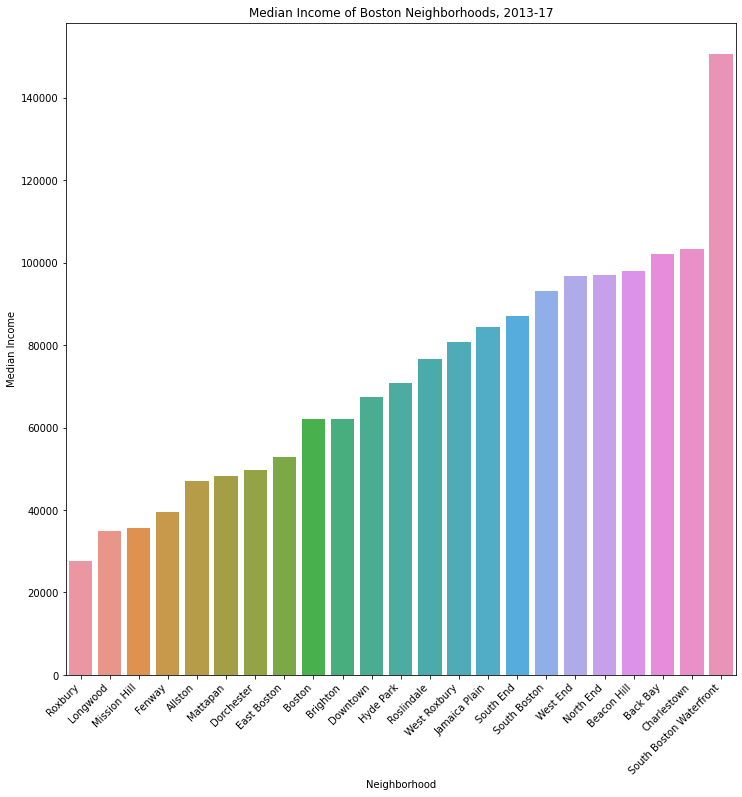

In [ ]:
result = demographics[['Neighborhood', 'Median Income']].sort_values('Median Income')

plt.figure(figsize=(12,12))
plot = sns.barplot(x='Neighborhood', y='Median Income', data=demographics, order=result['Neighborhood'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Median Income of Boston Neighborhoods, 2013-17")
plt.savefig('median-income-boston-2013-17')
plt.show()